In [1]:
#Importa os pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
plt.style.use('seaborn-darkgrid')
pd.set_option('float_format', '{:.2f}'.format)

#### Dicionário de Variáveis utilizadas
|Chave|Descrição|Função|
|-----|-----|-----|
|**Identificação**|
|Ano| Ano de referência|Controle|
|Trimestre| Trimestre de referência|Controle|
|UF| Estado|Controle|
|Capital| Capital da UF|Controle|
|UPA| Unidade Primária de Amostragem (UF(2) + número squencial(6) + DV(1))|Controle|
|V1008| Número do Domicílio|Controle|
|V1014| Painel - Grupo de Controle|Controle|
|V1016| Número de entrevista (1 a 5)|Controle|
|V2003| Número de ordem|Controle|
|**Características**|
|V2007| Sexo|Característica|
|V2008| Dia Nascimento|Característica|
|V20081| Mês nascimento|Característica|
|V20082| Ano nascimento|Característica|
|V2010| Raça|Característica|
|**Variáveis exploradas**|
| VD4001 | Condição em relação à força de trabalho na semana de referência para pessoas de 14 anos ou mais de idade | Descrição |
| VD4002 | Condição de ocupação na semana de referência para pessoas de 14 anos ou mais de idade | Descrição |
| VD4003 | Força de trabalho potencial para pessoas de 14 anos ou mais de idade | Descrição |
| VD4004A | Subocupação por insuficiência de horas efetivamente trabalhadas em todos os trabalhos | Descrição |
| VD4005 | Pessoas desalentadas na semana de referência | Descrição |
|**Auxiliares**|
|V1028| Peso do domicílio e das pessoas sem calibração|Expansão|
|V1029| Peso do domicílio e das pessoas com calibração|Expansão|
|V1033| Projeção da população por sexo e idade|Expansão|
|posest|Domínios de projeção geográficos|Expansão|

 Chave para pessoa: UPA + V1008 + V1014  + V2003 + V2007 + V2008 + V20081 + V20082

 **PARA ESTIMAÇÃO DA POPULAÇÃO, DEVE-SE USAR AS VARIÁVEIS: V1033 e posest.**



#### Importação e tratamento dos microdados

Importação dos microdados

In [2]:
#determina qual diretório usar para cada sistema operacional.
import os
if os.name == 'nt': #windows
    diretorio = 'C:\\Users\\est.matheus.brasil\\Documents\\Microdados PNAD Contínua\\feather\\'

else: #linux(ou mac)
    diretorio = '/home/matheus/Microdados PNAD/feather/'


#Leitura de todas as bases com as variáveis selecionadas e criação de variáveis dinamicamente.

colunas_selecionadas = ['Ano', 'Trimestre', 'UPA', 'UF', 'V1008', 'V1014', 'V2007', 'V2008', 'V20081', 'V20082', 'V2010', #Controle
                        'VD4001', 'VD4002', 'VD4003', 'VD4004A','VD4005', #Variáveis de interesse
                        'V1027', 'V1028', 'V1029', 'V1033', 'posest', 'posest_sxi'] #expansão

# colunas_selecionadas_sup = ['Ano', 'Trimestre', 'UPA', 'UF', 'V1008', 'V1014', 'V2007', 'V2008', 'V20081', 'V20082', 'V2010', #Controle
#                         'VD4001', 'VD4002', 'VD4003', 'VD4004A','S01021', #Variáveis de interesse
#                         'V1028', 'V1029', 'V1033', 'posest', 'posest_sxi'] #identificação
                        

for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
            #if tri == 4:
                #print(ano, tri)
                #globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}_suplementar.feather', columns=colunas_selecionadas_sup)
            #else:
                print(ano, tri)
                globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)
        if 2019 < ano < 2022:
            #if ano == 2021 & tri == 4:
                #print(ano, tri)
                #globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}_suplementar.feather', columns=colunas_selecionadas_sup)
            #else:
                print(ano, tri)
                globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)
        if ano == 2022 and tri < 3:
            print(ano, tri)
            globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)

2019 4
2020 1
2020 2
2020 3
2020 4
2021 1
2021 2
2021 3
2021 4
2022 1
2022 2


In [3]:
#Concatena todos os dataframes de cada ano e trimestre em uma unica tabela.

pnadc_completa = pd.concat([pnad_2019_4, 
                            pnad_2020_1, 
                            pnad_2020_2, 
                            pnad_2020_3, 
                            pnad_2020_4, 
                            pnad_2021_1, 
                            pnad_2021_2, 
                            pnad_2021_3, 
                            pnad_2021_4, 
                            pnad_2022_1, 
                            pnad_2022_2])

pnadc_completa['V2007'] = np.where(pnadc_completa['V2007'] == 'Homem', 0, 1)

In [4]:
pnadc_completa['UPA'] = pd.to_numeric(pnadc_completa['UPA'] , errors='coerce') 
pnadc_completa['V1008'] = pd.to_numeric(pnadc_completa['V1008'] , errors='coerce') 
pnadc_completa['V1014'] = pd.to_numeric(pnadc_completa['V1014'] , errors='coerce') 
pnadc_completa['V2007'] = pd.to_numeric(pnadc_completa['V2007'] , errors='coerce') 
pnadc_completa['V2008'] = pd.to_numeric(pnadc_completa['V2008'] , errors='coerce') 
pnadc_completa['V20081'] = pd.to_numeric(pnadc_completa['V20081'] , errors='coerce') 
pnadc_completa['V20082'] = pd.to_numeric(pnadc_completa['V20082'] , errors='coerce') 

In [5]:
pnadc_completa = pd.DataFrame({
    #Controle
    'Ano':pnadc_completa['Ano'], 
    'Trimestre':pnadc_completa['Trimestre'],
    'UPA':pnadc_completa['UPA'],
    'UF':pnadc_completa['UF'],
    'V2007':pnadc_completa['V2007'],
    #ID  
    'ID': pnadc_completa['UPA'] + 
        pnadc_completa['V1008'] + 
        pnadc_completa['V1014'] + 
        pnadc_completa['V2007'] +
        pnadc_completa['V2008'] +
        pnadc_completa['V20081'] +
        pnadc_completa['V20082'],
    #Exploradas
    'V2010': pnadc_completa['V2010'],
    'VD4001': pnadc_completa['VD4001'],
    'VD4002': pnadc_completa['VD4002'],
    'VD4003': pnadc_completa['VD4003'],
    'VD4004A': pnadc_completa['VD4004A'],
    'VD4005': pnadc_completa['VD4005'],
    #Expansão
    'V1027': pnadc_completa['V1027'],
    'V1028': pnadc_completa['V1028'],
    'V1029': pnadc_completa['V1029'],
    'V1033': pnadc_completa['V1033'],
    'posest': pnadc_completa['posest'],
    'posest_sxi': pnadc_completa['posest_sxi']
    })

#Reverte alteração da coluna V2007 para os rótulos anteiores
pnadc_completa['V2007'] = pnadc_completa['V2007'].apply(lambda x: 'Homem' if x == 0 else 'Mulher')

In [6]:
# Ordernação da série histórica por ano e trimestre.
pnadc_completa.sort_values(by=['Ano', 'Trimestre'], inplace=True)
#concatena a coluna 'Ano' e 'Trimestre' em uma única coluna.
pnadc_completa['ano_tri'] = pnadc_completa['Ano'].astype(str) + 'Q' + pnadc_completa['Trimestre'].astype(str)
#Conversão da coluna ano_tri para datetime.
pnadc_completa['ano_tri'] = pd.to_datetime(pnadc_completa['ano_tri']).dt.to_period('Q')

## Análise Exploratória

### PEA

In [7]:
pea = pd.crosstab(pnadc_completa['ano_tri'], pnadc_completa['VD4001'], values=pnadc_completa['V1028'], aggfunc='sum') / 1000000
pea_percentual = pd.crosstab(pnadc_completa['ano_tri'], pnadc_completa['VD4001'], values=pnadc_completa['V1028'], aggfunc='sum', normalize='index')

In [8]:
pea['Pessoas na força de trabalho']

VD4001,Pessoas fora da força de trabalho,Pessoas na força de trabalho
ano_tri,,
2019Q4,61.58,107.42
2020Q1,63.16,106.26
2020Q2,72.57,97.28
2020Q3,72.23,98.04
2020Q4,69.04,101.64
2021Q1,68.75,102.34
2021Q2,67.27,104.22
2021Q3,65.46,106.43
2021Q4,64.53,107.76


Gráfico da PEA

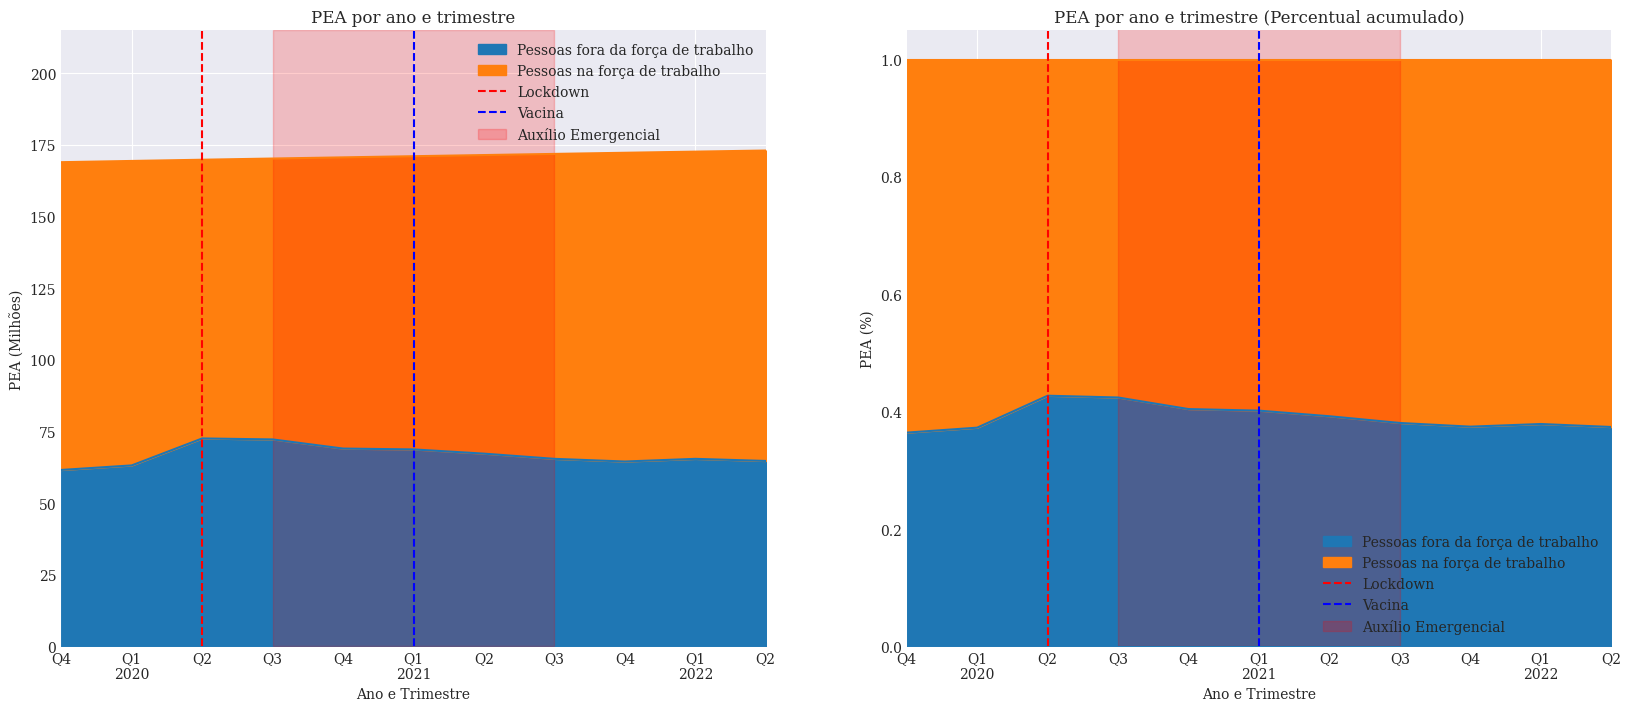

In [101]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
pea.plot.area(ax=ax[0], stacked=True, title='PEA por ano e trimestre', xlabel='Ano e Trimestre', ylabel='PEA (Milhões)', legend=True)
ax[0].set_ylim(0, 215)
pea_percentual.plot.area(ax=ax[1], stacked=True, title='PEA por ano e trimestre (Percentual acumulado)', xlabel='Ano e Trimestre',  ylabel='PEA (%)', legend=True)

#inserir uma linha vertical no gráfico em 2020Q2, 2021Q1
ax[0].axvline(x='2020Q2', color='red', linestyle='--', label='Lockdown')
ax[0].axvline(x='2021Q1', color='blue', linestyle='--', label='Vacina')
ax[1].axvline(x='2020Q2', color='red', linestyle='--', label='Lockdown')
ax[1].axvline(x='2021Q1', color='blue', linestyle='--', label='Vacina') 

ax[0].fill_betweenx(y=[0, 215], x1='2020Q3', x2='2021Q3', color='red', alpha=0.2, label='Auxílio Emergencial')
ax[1].fill_betweenx(y=[0, 215], x1='2020Q3', x2='2021Q3', color='red', alpha=0.2, label='Auxílio Emergencial')



ax[0].legend()
ax[1].legend()

plt.show()

#### Situação de ocupação para população na força de trabalho

In [10]:
pea_ocupacao = pnadc_completa[pnadc_completa['VD4001']=='Pessoas na força de trabalho']

In [11]:
pea_ocupacao.head()

,Ano,Trimestre,UPA,UF,V2007,ID,V2010,VD4001,VD4002,VD4003,VD4004A,VD4005,V1027,V1028,V1029,V1033,posest,posest_sxi,ano_tri
0,2019,4,110000016,Rondônia,Mulher,110002003,Parda,Pessoas na força de trabalho,Pessoas ocupadas,None,Pessoas subocupadas,None,98.76,145.63,532471,6982307,111,210,2019Q4
5,2019,4,110000016,Rondônia,Mulher,110002020,Parda,Pessoas na força de trabalho,Pessoas ocupadas,None,None,None,98.76,134.02,532471,6507966,111,211,2019Q4
9,2019,4,110000016,Rondônia,Homem,110002036,Branca,Pessoas na força de trabalho,Pessoas ocupadas,None,None,None,98.76,196.31,532471,8704572,111,105,2019Q4
10,2019,4,110000016,Rondônia,Mulher,110002035,Parda,Pessoas na força de trabalho,Pessoas ocupadas,None,None,None,98.76,196.31,532471,8527747,111,205,2019Q4
13,2019,4,110000016,Rondônia,Homem,110002030,Branca,Pessoas na força de trabalho,Pessoas ocupadas,None,None,None,98.76,171.00,532471,8515949,111,107,2019Q4


In [12]:
pea_forca_trabalho = pd.crosstab(pea_ocupacao['ano_tri'], [pea_ocupacao['VD4001'], pea_ocupacao['VD4002']], values=pea_ocupacao['V1028'], aggfunc='sum') / 1000000
pea_forca_trabalho_percentual = pd.crosstab(pea_ocupacao['ano_tri'], [pea_ocupacao['VD4001'], pea_ocupacao['VD4002']], values=pea_ocupacao['V1028'], aggfunc='sum', normalize='index')

In [22]:
pea_forca_trabalho

,UF,ano_tri,Pessoas na força de trabalho
0,Acre,2019Q4,0.35
1,Acre,2020Q1,0.34
2,Acre,2020Q2,0.34
3,Acre,2020Q3,0.33
4,Acre,2020Q4,0.36
...,...,...,...
292,Tocantins,2021Q2,0.74
293,Tocantins,2021Q3,0.76
294,Tocantins,2021Q4,0.77
295,Tocantins,2022Q1,0.77


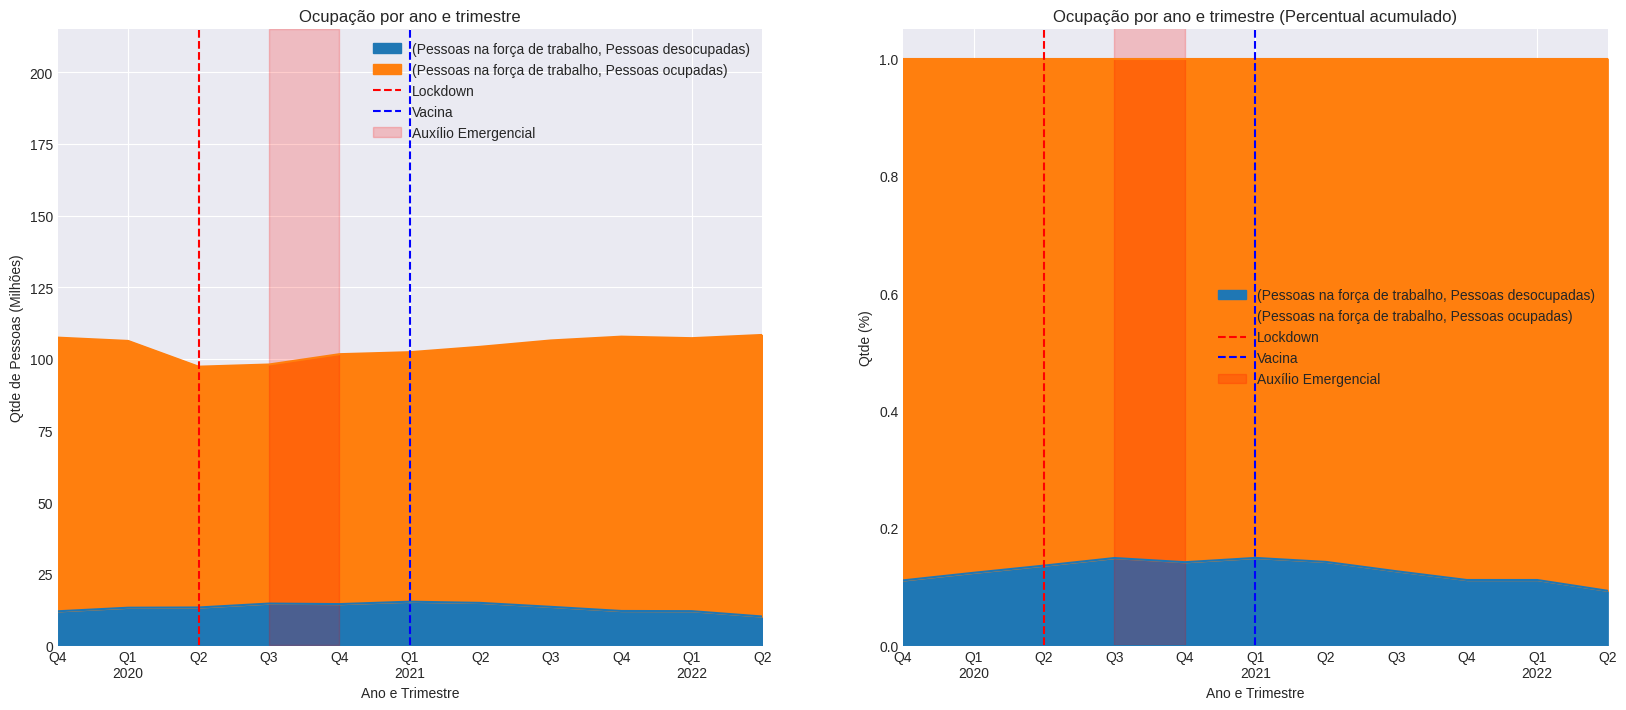

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
pea_forca_trabalho.plot.area(ax=ax[0], stacked=True, title='Ocupação por ano e trimestre', xlabel='Ano e Trimestre', ylabel='Qtde de Pessoas (Milhões)', legend=True)
ax[0].set_ylim(0, 215)
pea_forca_trabalho_percentual.plot.area(ax=ax[1], stacked=True, title='Ocupação por ano e trimestre (Percentual acumulado)', xlabel='Ano e Trimestre', ylabel='Qtde (%)', legend=True)

#inserir uma linha vertical no gráfico em 2020Q2, 2021Q1
ax[0].axvline(x='2020Q2', color='red', linestyle='--', label='Lockdown')
ax[0].axvline(x='2021Q1', color='blue', linestyle='--', label='Vacina')
ax[1].axvline(x='2020Q2', color='red', linestyle='--', label='Lockdown')
ax[1].axvline(x='2021Q1', color='blue', linestyle='--', label='Vacina') 

ax[0].fill_betweenx(y=[0, 215], x1='2020Q3', x2='2020Q4', color='red', alpha=0.2, label='Auxílio Emergencial')
ax[1].fill_betweenx(y=[0, 215], x1='2020Q3', x2='2020Q4', color='red', alpha=0.2, label='Auxílio Emergencial')

ax[0].legend()
ax[1].legend()
plt.show()

PEA por Estado

In [14]:
pea_forca_trabalho = pnadc_completa[pnadc_completa['VD4001']=='Pessoas na força de trabalho']
pea_fora_forca_trab = pnadc_completa[pnadc_completa['VD4001']=='Pessoas fora da força de trabalho']

In [15]:
pea_forca_trabalho = pd.crosstab(pea_forca_trabalho['ano_tri'] ,[pea_forca_trabalho['UF'], pea_forca_trabalho['VD4001']], values=pea_forca_trabalho['V1028'], aggfunc='sum') / 1000000
pea_fora_forca_trab = pd.crosstab(pea_fora_forca_trab['ano_tri'] ,[pea_fora_forca_trab['UF'], pea_fora_forca_trab['VD4001']], values=pea_fora_forca_trab['V1028'], aggfunc='sum') / 1000000

In [16]:
pea_forca_trabalho = pd.DataFrame(pea_forca_trabalho.unstack()).reset_index().drop('VD4001', axis=1)
pea_fora_forca_trab = pd.DataFrame(pea_fora_forca_trab.unstack()).reset_index().drop('VD4001', axis=1)

In [17]:
pea_forca_trabalho.columns = ['UF', 'ano_tri', 'Pessoas na força de trabalho']
pea_fora_forca_trab.columns = ['UF', 'ano_tri', 'Pessoas fora da força de trabalho']

In [18]:
pea_forca_trabalho['ano_tri'] = pea_forca_trabalho['ano_tri'].astype(str)
pea_fora_forca_trab['ano_tri'] = pea_fora_forca_trab['ano_tri'].astype(str)

In [23]:
pea_forca_estados = pd.merge(pea_forca_trabalho, pea_fora_forca_trab, on=['UF', 'ano_tri'])

In [31]:
labels = pea_forca_estados['ano_tri'].unique().tolist()
#capturar somente últimos 4 caracteres da string 
labels = [x[-4:] for x in labels]


/home/matheus/miniconda3/envs/econometria/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/matheus/miniconda3/envs/econometria/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/matheus/miniconda3/envs/econometria/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/matheus/miniconda3/envs/econometria/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/matheu

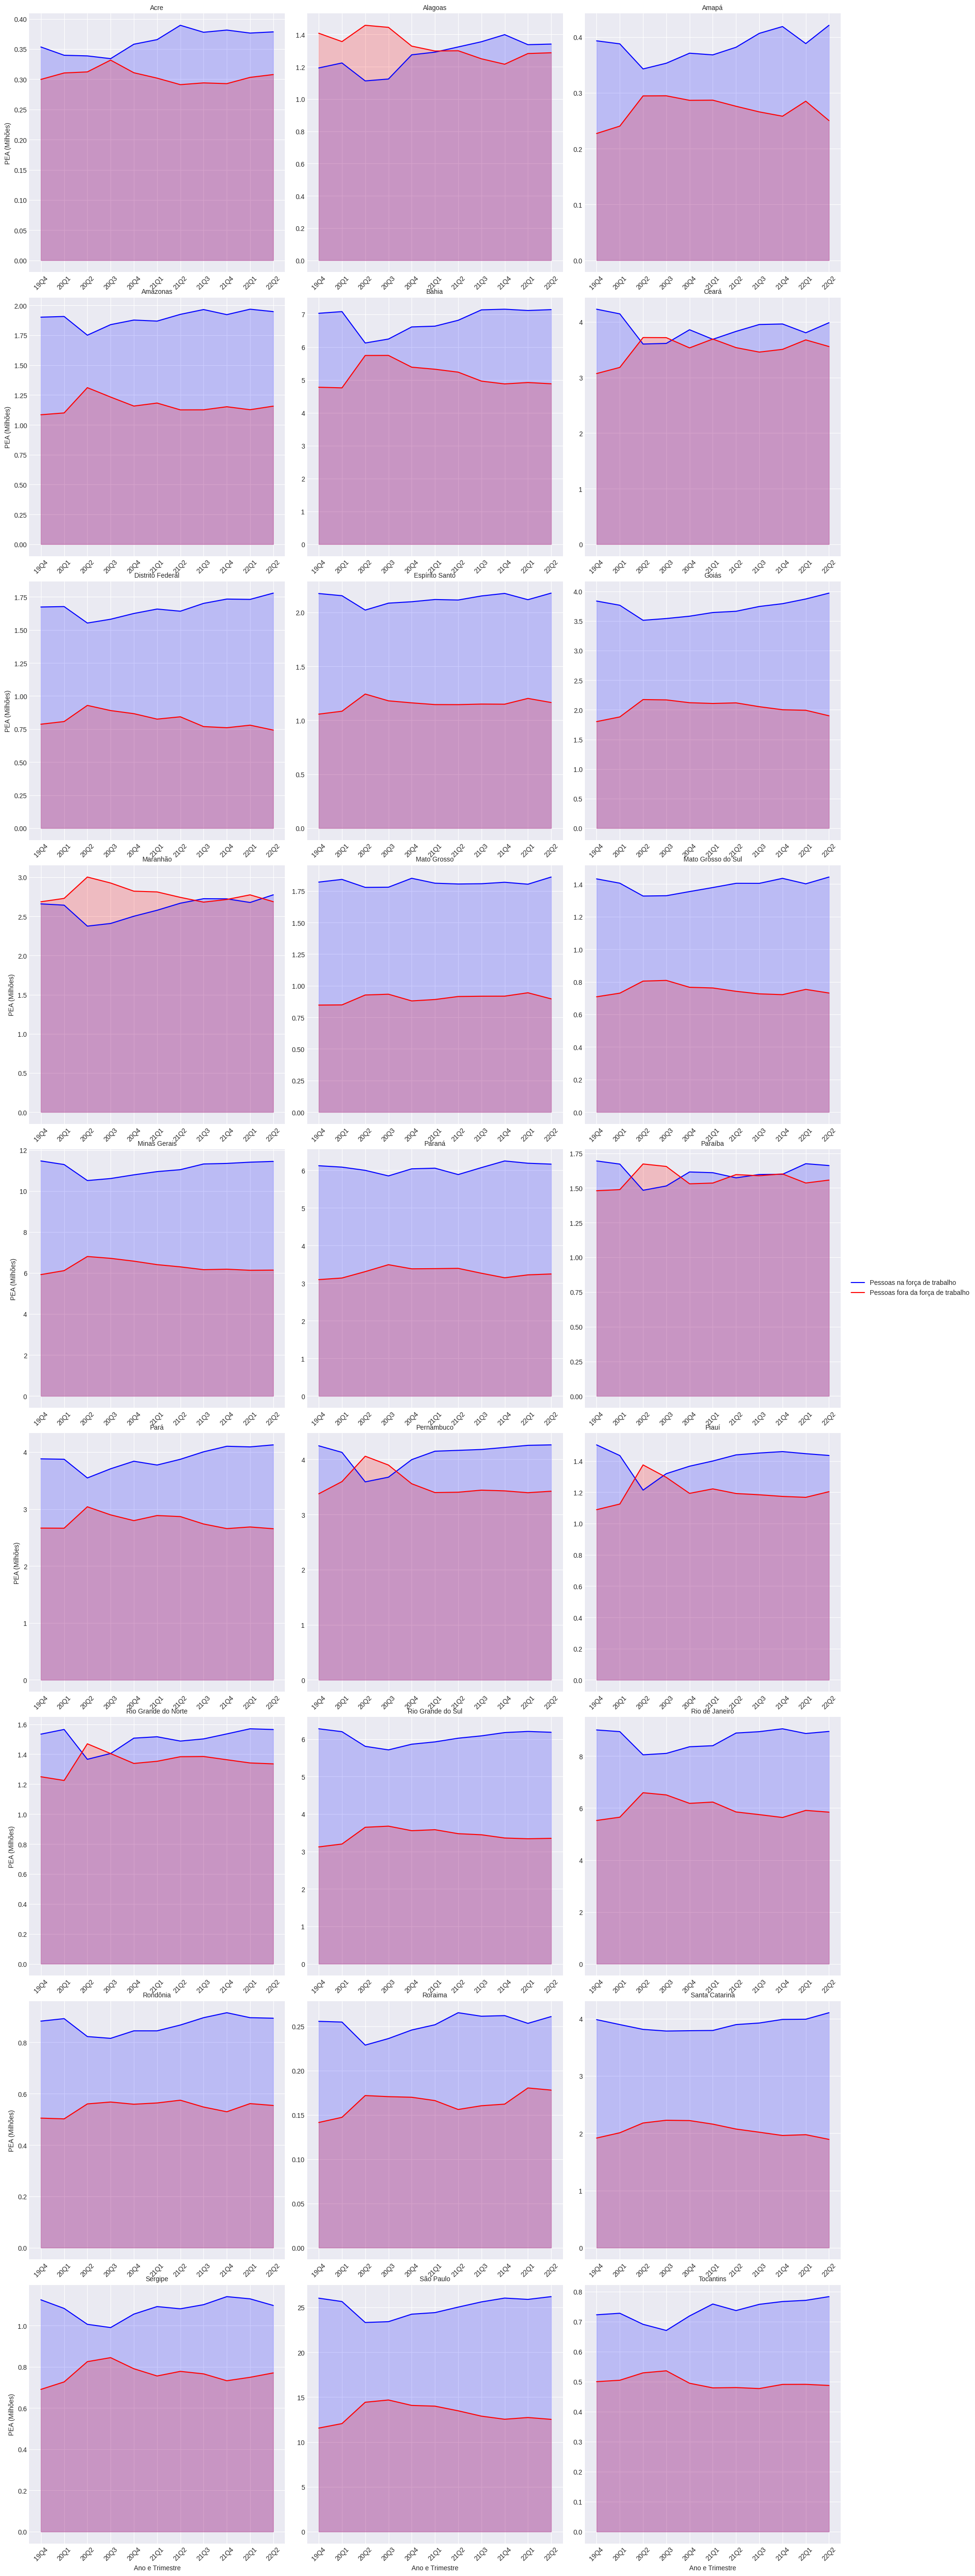

In [35]:
#plot a facetgrid com o gráfico de linha para cada estado.

g = sns.FacetGrid(pea_forca_estados, col='UF', col_wrap=3, height=6, sharey=False, sharex=False)
g = g.map(plt.plot, 'ano_tri', 'Pessoas na força de trabalho', label='Pessoas na força de trabalho', color='blue')
g = g.map(plt.plot, 'ano_tri', 'Pessoas fora da força de trabalho', label='Pessoas fora da força de trabalho', color='red')
g = g.map(plt.fill_between,'ano_tri', 'Pessoas na força de trabalho', color='blue', alpha=0.2).set_titles("{col_name}")
g = g.map(plt.fill_between,'ano_tri', 'Pessoas fora da força de trabalho', color='red', alpha=0.2).set_titles("{col_name}")
g = g.add_legend()

# g.set_titles('{col_name}')
g.set_axis_labels('Ano e Trimestre', 'PEA (Milhões)')
#rotacionar rotulos do eixo x 
g.set_xticklabels(labels=labels, rotation=45)

#colocar legenda
#g.add_legend()
# g.set(xlim=('2010Q1', '2020Q2'))
#g.set(ylim=(0, 173))
# g.fig.suptitle('PEA por ano e trimestre por estado', y=1.05)
plt.show()


In [ ]:
pd.crosstab(pnadc_completa['ano_tri'], [pnadc_completa['VD4001'], pnadc_completa['VD4002']], values=pnadc_completa['V1028'], aggfunc='sum')

VD4001  Pessoas na força de trabalho                 
VD4002           Pessoas desocupadas Pessoas ocupadas
ano_tri                                              
2019Q4                   11902662.68      95514997.13
2020Q1                   13147927.78      93114584.55
2020Q2                   13228404.89      84050907.36
2020Q3                   14597503.44      83439420.08
2020Q4                   14411542.28      87225343.84
2021Q1                   15256839.81      87082018.50
2021Q2                   14831515.72      89384334.98
2021Q3                   13453389.81      92976445.62
2021Q4                   12010635.92      95747457.85
2022Q1                   11949047.48      95275255.91
2022Q2                   10080109.51      98268976.77

Fluxo de desemprego

In [40]:
fluxo1 = pnadc_completa[(pnadc_completa['ano_tri']=='2019Q4')&(pnadc_completa['VD4001']=='Pessoas na força de trabalho')][['ID','VD4002']]
fluxo2 = pnadc_completa[(pnadc_completa['ano_tri']=='2020Q1')&(pnadc_completa['VD4001']=='Pessoas na força de trabalho')][['ID','VD4002']]
fluxos = pd.merge(fluxo1, fluxo2, on='ID', how='inner')
fluxos.columns = ['ID', 'VD4002 2019', 'VD4002 2020']

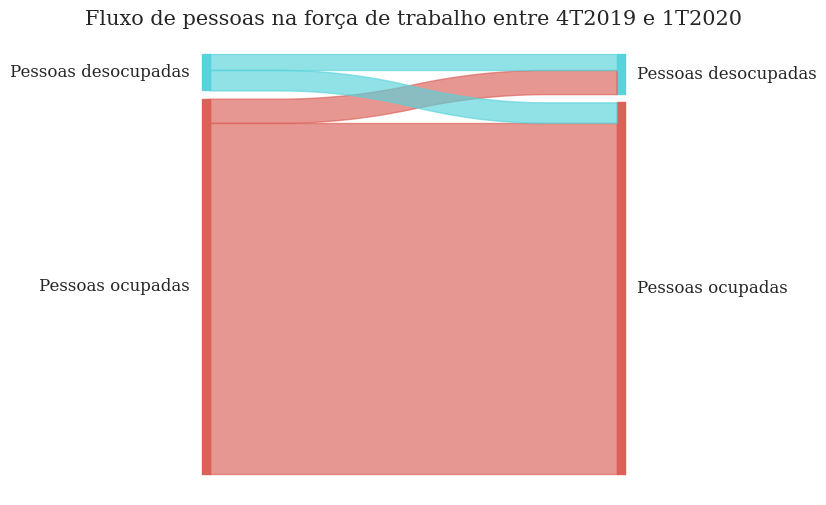

In [41]:
from pySankey.sankey import sankey


sankey(fluxos["VD4002 2019"], fluxos["VD4002 2020"], aspect=20, fontsize=12, )
plt.title('Fluxo de pessoas na força de trabalho entre 4T2019 e 1T2020', fontsize=15)
plt.show()

### Gráfico Sunburst